IMPORTANDO BIBLIOTECAS

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

INDICANDO CAMINHO DO ARQUIVO COM O DATAFRAME DOS DADOS EM MÁQUINA LOCAL

In [3]:
#Indicando caminho do arquivo
caminho_dataframe = '/home/leticia/Downloads/projeto_max_cut/AD_mat_GSE125583.txt'
# Lendo arquivo
dados_coexpressao = pd.read_csv(caminho_dataframe, delimiter='\t')

FILTRANDO DATAFRAME APENAS COM AS INFORMAÇÕES DESEJADAS

In [4]:
# Selecionando apenas os 7 primeiros genes
dados_coexpressao_primeiras7 = dados_coexpressao.iloc[:, :7]
#Visualizando novo data frame
print(dados_coexpressao_primeiras7)

                    SRR8482616  SRR8482617  SRR8482618  SRR8482619  \
ENSG00000000003.10         139         435         329         217   
ENSG00000000005.5            3           0           1           1   
ENSG00000000419.8          247         274         247         201   
ENSG00000000457.9           23         251         213         108   
ENSG00000000460.12           6          91         227          32   
...                        ...         ...         ...         ...   
ENSG00000273487.1          140         147         110         184   
ENSG00000273488.1            2           7           8           6   
ENSG00000273489.1            0           4           4          10   
ENSG00000273492.1           62          57          94         190   
ENSG00000273493.1           12           9           5           9   

                    SRR8482620  SRR8482621  SRR8482622  
ENSG00000000003.10         287         637         396  
ENSG00000000005.5            1           0   

CÁLCULO DA MATRIZ DE CORRELAÇÃO GENE-GENE

In [5]:
# Calcule a matriz de correlação de coexpressão gene-gene para os 7 genes
matriz_correlacao = dados_coexpressao_primeiras7.corr()
#Visualizando matriz
print(matriz_correlacao)

            SRR8482616  SRR8482617  SRR8482618  SRR8482619  SRR8482620  \
SRR8482616    1.000000    0.895247    0.869715    0.877679    0.886371   
SRR8482617    0.895247    1.000000    0.979228    0.970684    0.980965   
SRR8482618    0.869715    0.979228    1.000000    0.988388    0.993073   
SRR8482619    0.877679    0.970684    0.988388    1.000000    0.988650   
SRR8482620    0.886371    0.980965    0.993073    0.988650    1.000000   
SRR8482621    0.884605    0.975102    0.986737    0.982093    0.992823   
SRR8482622    0.870716    0.977241    0.981764    0.976470    0.979530   

            SRR8482621  SRR8482622  
SRR8482616    0.884605    0.870716  
SRR8482617    0.975102    0.977241  
SRR8482618    0.986737    0.981764  
SRR8482619    0.982093    0.976470  
SRR8482620    0.992823    0.979530  
SRR8482621    1.000000    0.975185  
SRR8482622    0.975185    1.000000  


GERANDO GRAFO A PARTIR DO NOVO DATAFRAME

In [6]:
# Crie um grafo direcionado
G = nx.DiGraph()

# Adicionando nós (genes) ao grafo com os nomes "Gene 1", "Gene 2" e assim por diante até último nó
nomes_genes = [f"Gene {i + 1}" for i in range(len(dados_coexpressao_primeiras7.columns))]
G.add_nodes_from(nomes_genes)

# Criando um DataFrame que mapeia os nomes antigos dos genes para os novos nomes
mapeamento_nomes = pd.DataFrame({
    'Código do Gene': dados_coexpressao_primeiras7.columns,
    'Novo Nome': nomes_genes
})
# Exportando o mapeamento da relação dos nomes antigos com os novos dos genes para um arquivo CSV
caminho_mapeamento = '/home/leticia/Downloads/projeto_max_cut/mapeamento_genes.csv'
mapeamento_nomes.to_csv(caminho_mapeamento, index=False)

# Itere sobre as células da matriz de correlação e adicione arestas com base no seu limite (evitando self-loops)
for gene1 in dados_coexpressao_primeiras7.columns:
    for gene2 in dados_coexpressao_primeiras7.columns:
        if gene1 != gene2:  # Evitar self-loops
            correlacao = matriz_correlacao.loc[gene1, gene2]
            if correlacao > 0.88 or correlacao < -0.88:
                nome_gene1 = f"Gene {list(dados_coexpressao_primeiras7.columns).index(gene1) + 1}"
                nome_gene2 = f"Gene {list(dados_coexpressao_primeiras7.columns).index(gene2) + 1}"
                G.add_edge(nome_gene1, nome_gene2, weight=correlacao)

# Especificando o caminho para o novo arquivo de saída do grafo
caminho_grafo_saida = '/home/leticia/Downloads/projeto_max_cut/grafico_coexpressao.gml'

# Salvando o grafo em um arquivo no formato GML
nx.write_gml(G, caminho_grafo_saida)

# Exibindo informações básicas sobre o grafo
print(f"Número de nós (genes): {len(G.nodes)}")
print(f"Número de arestas (correlações): {len(G.edges)}")

Número de nós (genes): 7
Número de arestas (correlações): 36


VIZUALIZANDO E EXPORTANDO GRAFO

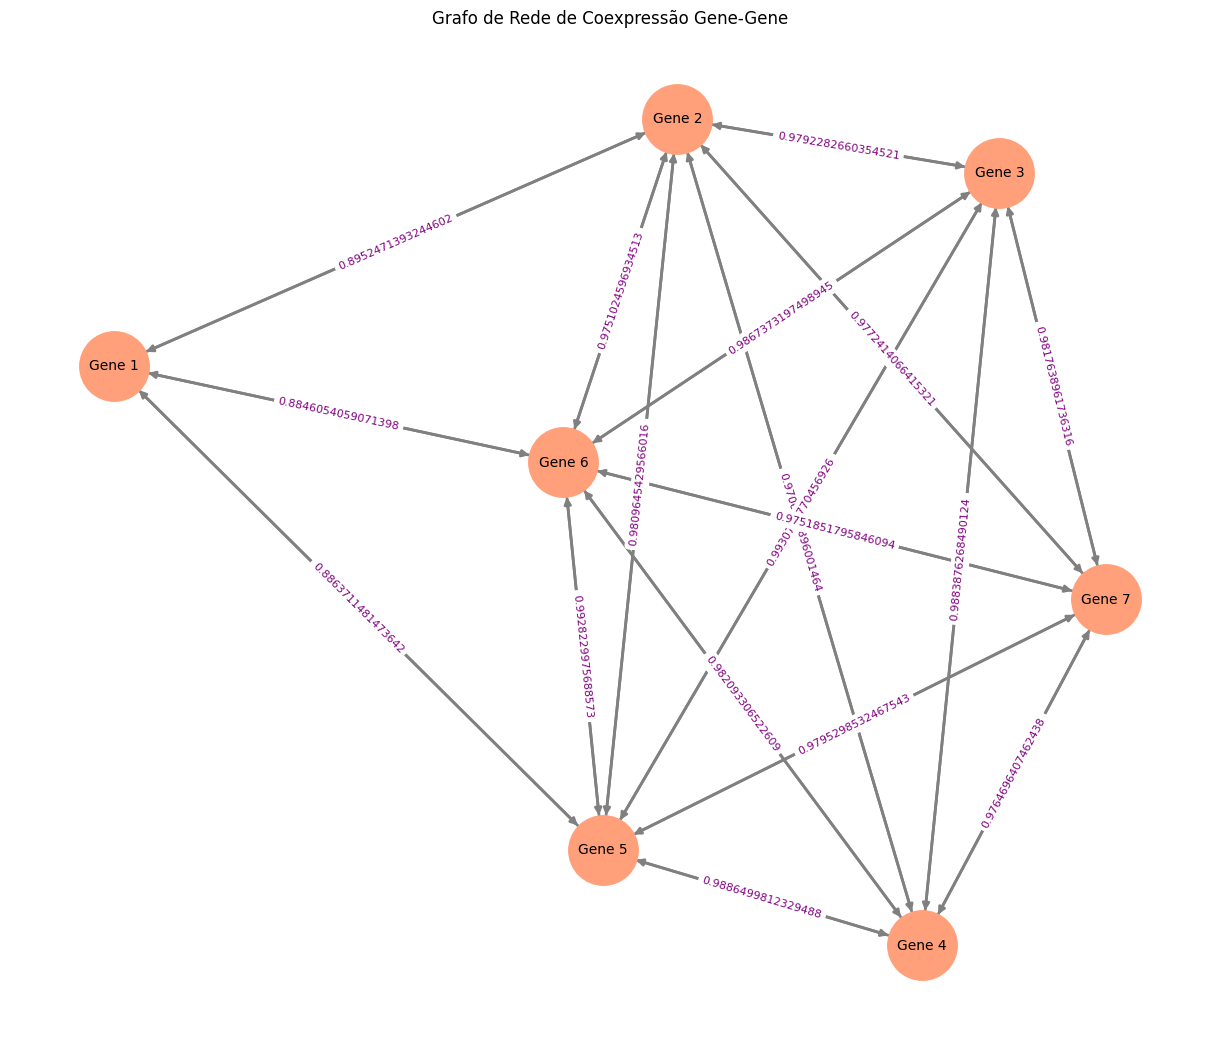

In [9]:
# Visualizando o grafo com os nomes trocados
pos = nx.spring_layout(G, k=0.3)
labels = {node: node for node in G.nodes}
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges}

plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2500, node_color='lightsalmon', font_size=10,
        edge_color='gray', width=2.0)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='purple')
plt.title("Grafo de Rede de Coexpressão Gene-Gene")

# Exportando a imagem em formato PNG
plt.savefig('grafo_coexpressao_personalizado.png', format='png', dpi=300)  # Altere o nome do arquivo conforme necessário
#Visualizando grafo
plt.show()
